In [97]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import csv
import pandas as pd
import numpy as np
import sys

#train
data = []
with open('TrainPT_gfr_C.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        data.append(row[0:len(row)-1])
title = data[0]
del data[0]
del title[0]

i = 0

while i < len(data):
    j = 0
    while j < len(data[i]):
        data[i][j] = float(data[i][j])
        j += 1
    i += 1
i = 0
while i < len(data):
    j = 0
    while j < len(data[i]):
        if data[i][j] >= sys.float_info.max:
            data[i][j] = -1
        j += 1
    i += 1
# print(data)

target = []
with open('TrainPT_gfr_C.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        target.append(row[len(row)-1])

del target[0]
i = 0
while i < len(target):
    target[i] = float(target[i])
    target[i] = int(target[i])
    i += 1

x_train = np.array(data)
y_train = np.array(target)

#val
data = []
with open('ValPT_gfr_C.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        data.append(row[0:len(row)-1])
title = data[0]
del data[0]
del title[0]
 
i = 0

while i < len(data):
    j = 0
    while j < len(data[i]):
        data[i][j] = float(data[i][j])
        j += 1
    i += 1
i = 0
while i < len(data):
    j = 0
    while j < len(data[i]):
        if data[i][j] >= sys.float_info.max:
            data[i][j] = -1
        j += 1
    i += 1

target = []
with open('ValPT_gfr_C.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        target.append(row[len(row)-1])

del target[0]
i = 0
while i < len(target):
    target[i] = float(target[i])
    target[i] = int(target[i])
    i += 1

x_test = np.array(data)
y_test = np.array(target)
print(len(title))


19


In [98]:
#x_train,x_test,y_train,y_test = train_test_split(data,target,train_size=0.7,random_state = 1)

x_train_pt = []
for i in x_train:
    x_train_pt.append(int(i[0]))
x_test_pt = []
for i in x_test:
    x_test_pt.append(int(i[0]))

x_test = np.delete(x_test,0,axis = -1)
x_train = np.delete(x_train,0,axis = -1)
print(len(x_test[0]),len(x_train))

# 建立 XGBOOST 模型
xgbc = XGBClassifier()
xgbc_fit = xgbc.fit(x_train, y_train)
y_predict = xgbc.predict(x_test)

19 24530


In [99]:
print("Model Accuracy\t\t: ",xgbc.score(x_test,y_test))

Model Accuracy		:  0.8021360314783587


creatinine_0 nettotal MSI_0 cirrhosis albumin_0 Hct_0 weight TP_fever potassium_0 sodium_0


<Figure size 720x720 with 0 Axes>

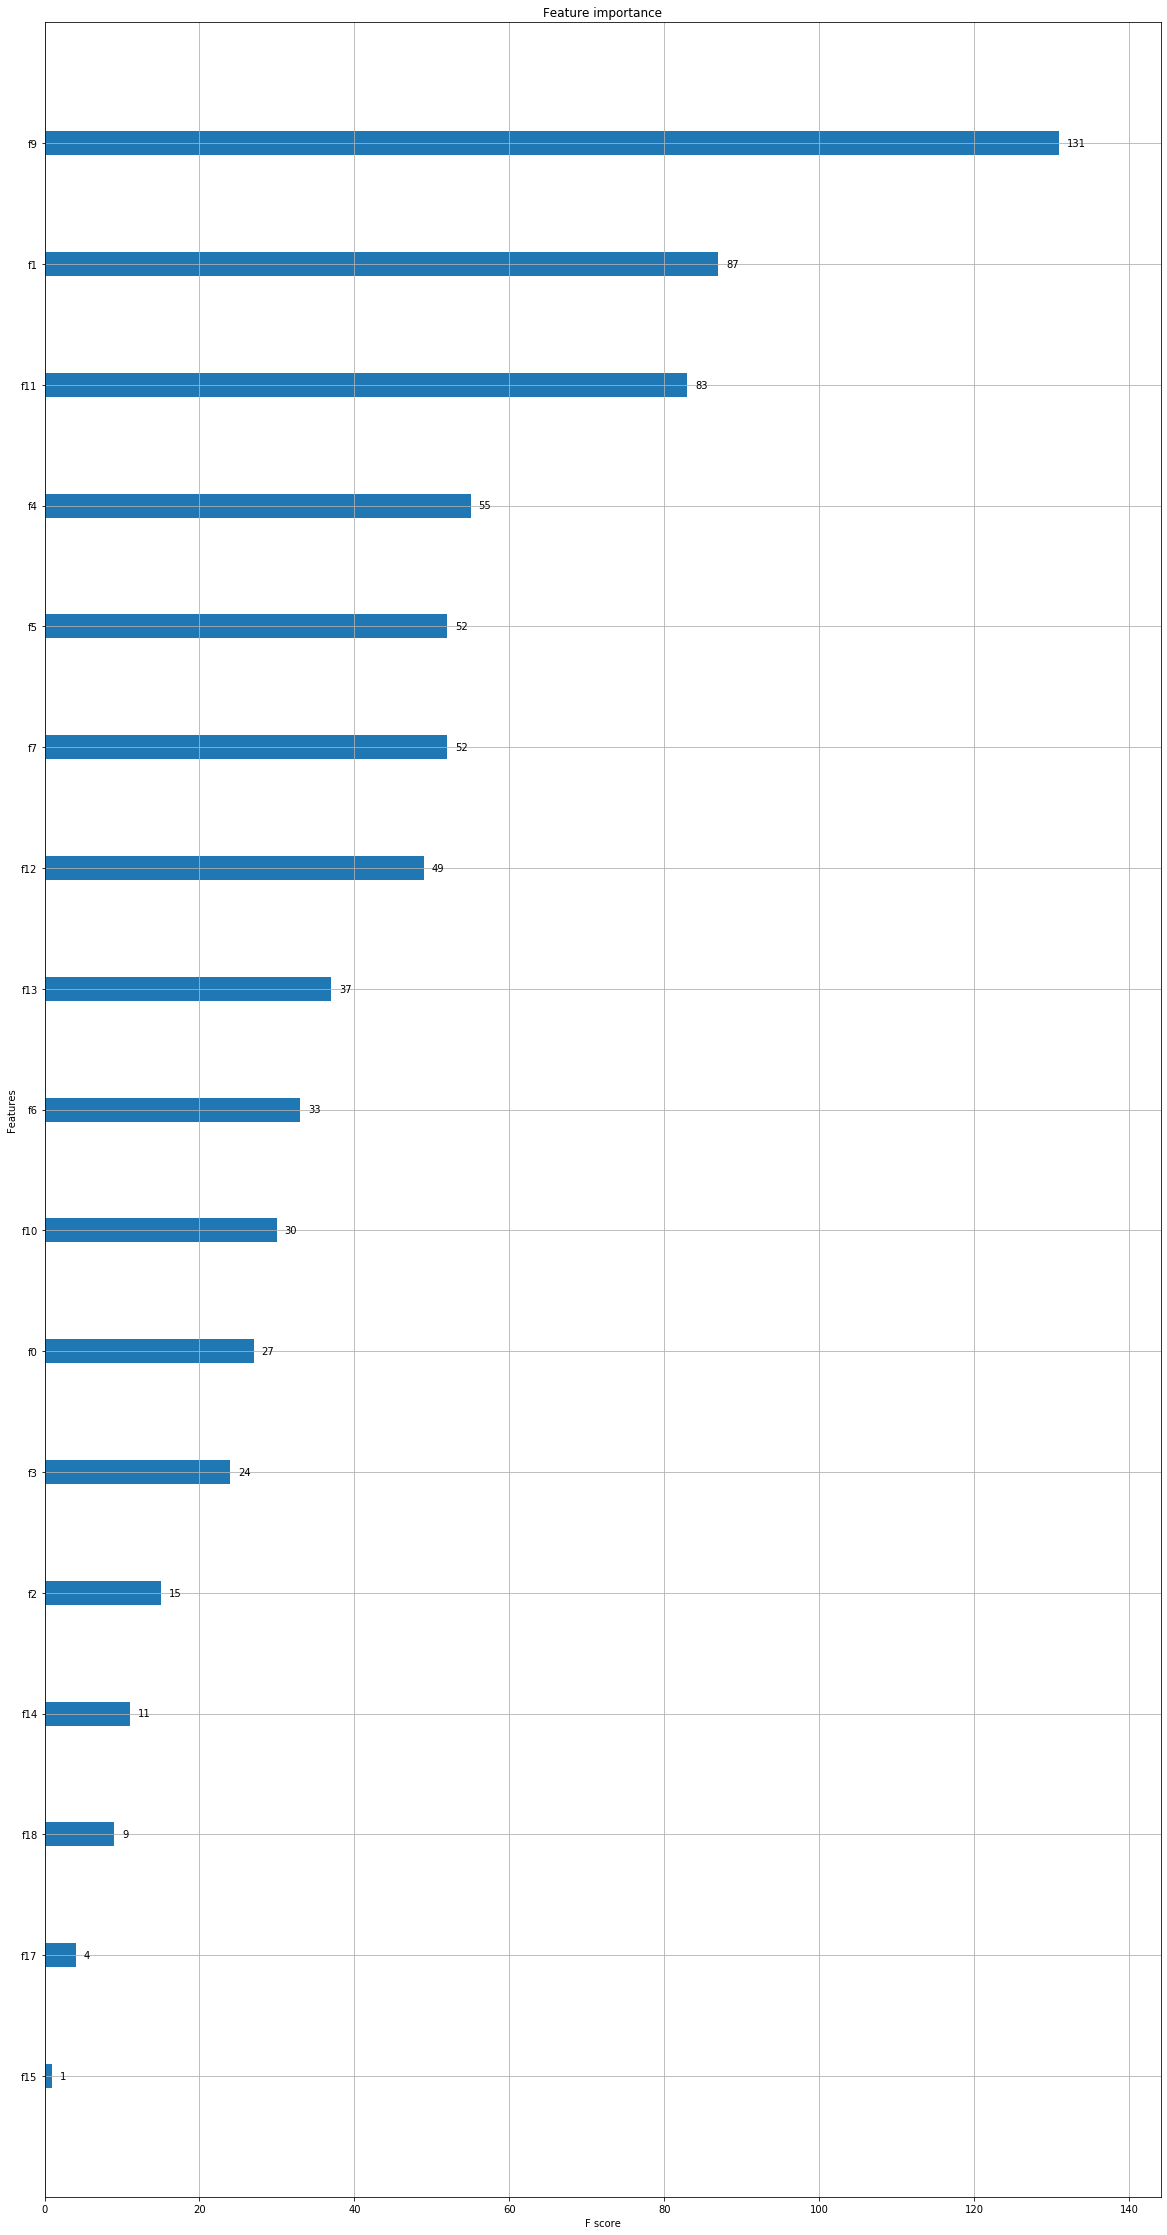

In [102]:
def Second(elem):
    return elem[1]
pyplot.figure(figsize=(10,10))
from xgboost import plot_importance

tryit = plot_importance(xgbc)
tryit.figure.set_size_inches(20,40)

print(title[9],title[1],title[12],title[14],title[11],title[4],title[13],title[8],title[2],title[3])


Model Sensitivity	:  0.8259551243177683
Model Specificity	:  0.7815610267155579


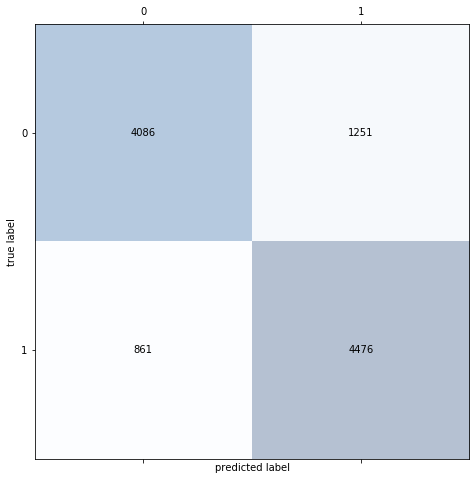

In [101]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
confmat = confusion_matrix(y_true=y_test, y_pred=y_predict)
a = str(confmat[0])
b = str(confmat[1])
tfpn = []
a = a.split()
for i in a:
    tfpn.append(i)
b = b.split()
for i in b:
    tfpn.append(i)
i=0
while i < len(tfpn):
    tfpn[i] = ''.join([x for x in tfpn[i] if x.isdigit()])
    if tfpn[i] != '':
        tfpn[i] = int(tfpn[i])
    i += 1
while '' in tfpn:
    tfpn.remove('')
print("Model Sensitivity\t: ",tfpn[0]/(tfpn[0]+tfpn[2]))
print("Model Specificity\t: ",tfpn[3]/(tfpn[1]+tfpn[3]))
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()

In [72]:
import pickle

filename="xgbc.sav"
pickle.dump(xgbc, open(filename, 'wb'))  

In [292]:
tp = []#true positive
fp = []#false positive
tn = []#true negative
fn = []#false negative
i = 0
rp = []#real positive
rn = []#real negative
while i < len(y_test):
    if y_test[i] == 1:
        rp.append(x_test_pt[i])
        if y_predict[i] == 1:
            #true positive
            tp.append(x_test_pt[i])
        else:
            #false negative
            fn.append(x_test_pt[i])
    else:
        rn.append(x_test_pt[i])
        if y_predict[i] == 1:
            #false positive
            fp.append(x_test_pt[i])
        else:
            #true negative
            tn.append(x_test_pt[i])
    i += 1
true_p = tp + tn #predict result is correct
false_p = fp + fn #predict result is wrong
p_true = tp + fp #predict result is true
p_false = tn + fn #predict result is false

In [293]:
feature_where = title.index("creatinine_0")
gfr_tp = []
gfr_fp = []
gfr_tn = []
gfr_fn = []
for i in tp:
    pt_where = x_test_pt.index(i)
    gfr_tp.append(x_test[pt_where][feature_where])
for i in fp:
    pt_where = x_test_pt.index(i)
    gfr_fp.append(x_test[pt_where][feature_where])
for i in tn:
    pt_where = x_test_pt.index(i)
    gfr_tn.append(x_test[pt_where][feature_where])
for i in fn:
    pt_where = x_test_pt.index(i)
    gfr_fn.append(x_test[pt_where][feature_where])
plt.figure(figsize=(15,10))

#predict correct or wrong feature
gfr_true_tp = []
gfr_false_tp = []
for i in true_p:
    pt_where = x_test_pt.index(i)
    gfr_true_tp.append(x_test[pt_where][feature_where])
for i in false_p:
    pt_where = x_test_pt.index(i)
    gfr_false_tp.append(x_test[pt_where][feature_where])

#predict aki or not feature
predict_aki_pt = []
predict_noaki_pt = []
for i in p_true:
    pt_where = x_test_pt.index(i)
    predict_aki_pt.append(x_test[pt_where][feature_where])
for i in p_false:
    pt_where = x_test_pt.index(i)
    predict_noaki_pt.append(x_test[pt_where][feature_where])

#real aki or not feature
real_aki_pt = []
real_noaki_pt = []
for i in rp:
    pt_where = x_test_pt.index(i)
    real_aki_pt.append(x_test[pt_where][feature_where])
for i in rn:
    pt_where = x_test_pt.index(i)
    real_noaki_pt.append(x_test[pt_where][feature_where])


<Figure size 1080x720 with 0 Axes>

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 3, 1, 4, 1, 4, 2, 5, 2, 4, 4, 2, 4, 5, 3, 3, 4, 8, 3, 3, 3, 7, 1, 6, 4, 2, 2, 4, 2, 3, 1, 3, 0, 4, 1, 5, 2, 2, 2, 0, 3, 4, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 3, 1, 7, 3, 8, 2, 8, 6, 8, 5, 6, 7, 7, 3, 8, 2, 0, 2, 5, 0, 5, 2, 4, 3, 3, 0, 2, 0, 2, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

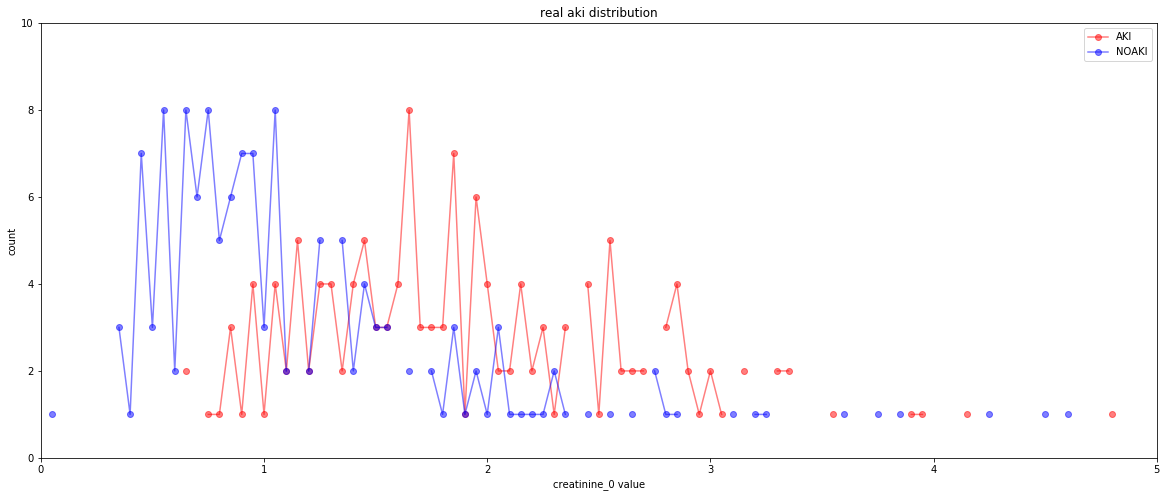

In [298]:
x1 = np.arange(0,10,0.05)
plt.figure(figsize=(20,8))
plt.xlabel("creatinine_0 value") 
plt.ylabel("count") 
plt.title("real aki distribution") 
real_aki_pt.sort()
true_count = [0]*200
true_value = []

for i in real_aki_pt:
    ii = 199
    while ii >= 0 :
        if float(i) > 0.05*ii:
            true_count[ii] += 1
            break
        else:
            ii -= 1

real_noaki_pt.sort()
false_count = [0]*200
false_value = []
for i in real_noaki_pt:
    ii = 199
    while ii >= 0 :
        if float(i) > 0.05*ii:
            false_count[ii] += 1
            break
        else:
            ii -= 1

print(true_count)
print(false_count)
i = 0
while i < len(true_count):
    if true_count[i] == 0:
        true_count[i] = None
    i += 1
i = 0
while i < len(false_count):
    if false_count[i] == 0:
        false_count[i] = None
    i += 1
plt.plot(x1,true_count, '-o', color="red",label = 'AKI', alpha=.5)
i = 0
plt.ylim(0, 10)
plt.xlim(0, 5)
plt.plot(x1,false_count,'-o', color="blue",label = 'NOAKI', alpha=.5)
aki_true_count = true_count
aki_false_count = false_count
plt.legend()
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 4, 1, 3, 1, 4, 3, 1, 2, 4, 4, 6, 3, 9, 3, 5, 4, 4, 1, 6, 3, 4, 3, 5, 3, 2, 3, 3, 0, 4, 1, 6, 2, 3, 1, 2, 4, 4, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 3, 1, 7, 3, 8, 2, 10, 6, 9, 6, 9, 7, 8, 4, 8, 3, 2, 3, 5, 1, 6, 4, 5, 2, 0, 1, 1, 0, 0, 0, 6, 1, 2, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

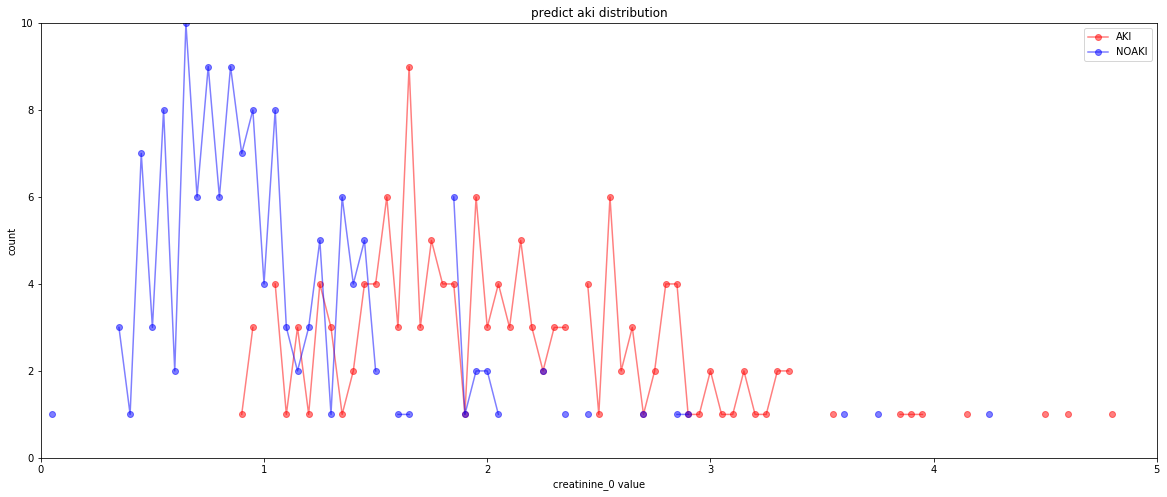

In [299]:
x1 = np.arange(0,10,0.05)
plt.figure(figsize=(20,8))
plt.xlabel("creatinine_0 value") 
plt.ylabel("count") 
plt.title("predict aki distribution") 
predict_aki_pt.sort()
true_count = [0]*200
true_value = []

for i in predict_aki_pt:
    ii = 199
    while ii >= 0 :
        if float(i) > 0.05*ii:
            true_count[ii] += 1
            break
        else:
            ii -= 1

predict_noaki_pt.sort()
false_count = [0]*200
false_value = []
for i in predict_noaki_pt:
    ii = 199
    while ii >= 0 :
        if float(i) > 0.05*ii:
            false_count[ii] += 1
            break
        else:
            ii -= 1

print(true_count)
print(false_count)
i = 0
while i < len(true_count):
    if true_count[i] == 0:
        true_count[i] = None
    i += 1
i = 0
while i < len(false_count):
    if false_count[i] == 0:
        false_count[i] = None
    i += 1
plt.plot(x1,true_count, '-o', color="red",label = 'AKI', alpha=.5)
i = 0
plt.ylim(0, 10)
plt.xlim(0, 5)
plt.plot(x1,false_count,'-o', color="blue",label = 'NOAKI', alpha=.5)
plt.legend()
plt.show()

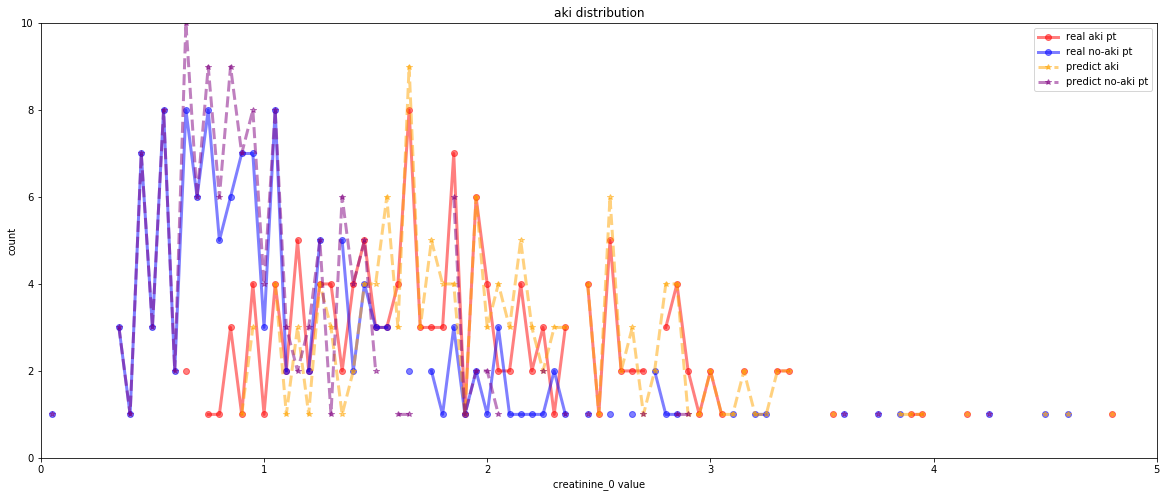

In [300]:
plt.figure(figsize=(20,8))
plt.ylim(0, 10)
plt.xlim(0, 5)
plt.plot(x1,aki_true_count, '-o', color="red", alpha=.5,label = 'real aki pt', lw=3)
plt.plot(x1,aki_false_count,'-o', color="blue", alpha=.5,label = 'real no-aki pt', lw=3)
plt.plot(x1,true_count, '--*', color="orange", alpha=.5,label = 'predict aki', lw=3)
plt.plot(x1,false_count,'--*', color="purple", alpha=.5,label = 'predict no-aki pt', lw=3)
plt.xlabel("creatinine_0 value") 
plt.ylabel("count") 
plt.title("aki distribution") 
plt.legend()
plt.show()

In [245]:
feature_where = title.index("BUN_0")
gfr_tp = []
gfr_fp = []
gfr_tn = []
gfr_fn = []
for i in tp:
    pt_where = x_test_pt.index(i)
    gfr_tp.append(x_test[pt_where][feature_where])
for i in fp:
    pt_where = x_test_pt.index(i)
    gfr_fp.append(x_test[pt_where][feature_where])
for i in tn:
    pt_where = x_test_pt.index(i)
    gfr_tn.append(x_test[pt_where][feature_where])
for i in fn:
    pt_where = x_test_pt.index(i)
    gfr_fn.append(x_test[pt_where][feature_where])
plt.figure(figsize=(15,10))

#predict correct or wrong feature
gfr_true_tp = []
gfr_false_tp = []
for i in true_p:
    pt_where = x_test_pt.index(i)
    gfr_true_tp.append(x_test[pt_where][feature_where])
for i in false_p:
    pt_where = x_test_pt.index(i)
    gfr_false_tp.append(x_test[pt_where][feature_where])

#predict aki or not feature
predict_aki_pt = []
predict_noaki_pt = []
for i in p_true:
    pt_where = x_test_pt.index(i)
    predict_aki_pt.append(x_test[pt_where][feature_where])
for i in p_false:
    pt_where = x_test_pt.index(i)
    predict_noaki_pt.append(x_test[pt_where][feature_where])

#real aki or not feature
real_aki_pt = []
real_noaki_pt = []
for i in rp:
    pt_where = x_test_pt.index(i)
    real_aki_pt.append(x_test[pt_where][feature_where])
for i in rn:
    pt_where = x_test_pt.index(i)
    real_noaki_pt.append(x_test[pt_where][feature_where])



<Figure size 1080x720 with 0 Axes>

[1, 1, 2, 3, 4, 8, 11, 10, 19, 29, 24, 30, 44, 43, 48, 50, 55, 69, 78, 72, 74, 61, 78, 70, 85, 80, 75, 90, 86, 80, 81, 85, 61, 71, 78, 99, 70, 71, 64, 76, 68, 63, 52, 85, 71, 63, 42, 46, 65, 55, 49, 57, 49, 47, 56, 48, 41, 38, 44, 43, 38, 39, 41, 42, 36, 30, 29, 42, 34, 30, 32, 32, 36, 28, 30, 29, 20, 22, 14, 19, 16, 17, 29, 18, 17, 14, 20, 17, 12, 20, 19, 19, 19, 13, 16, 21, 16, 12, 10, 1171]
[0, 6, 18, 16, 42, 66, 97, 114, 166, 161, 192, 209, 217, 213, 231, 197, 195, 165, 173, 158, 127, 118, 109, 95, 93, 76, 69, 61, 81, 70, 47, 46, 41, 34, 38, 43, 28, 41, 38, 34, 23, 24, 30, 27, 17, 22, 20, 17, 15, 13, 13, 10, 11, 18, 8, 9, 12, 14, 10, 10, 9, 10, 14, 13, 6, 4, 6, 7, 10, 5, 2, 4, 6, 5, 2, 5, 2, 6, 7, 2, 3, 2, 3, 3, 5, 4, 4, 2, 4, 1, 1, 2, 0, 3, 4, 2, 1, 1, 1, 918]


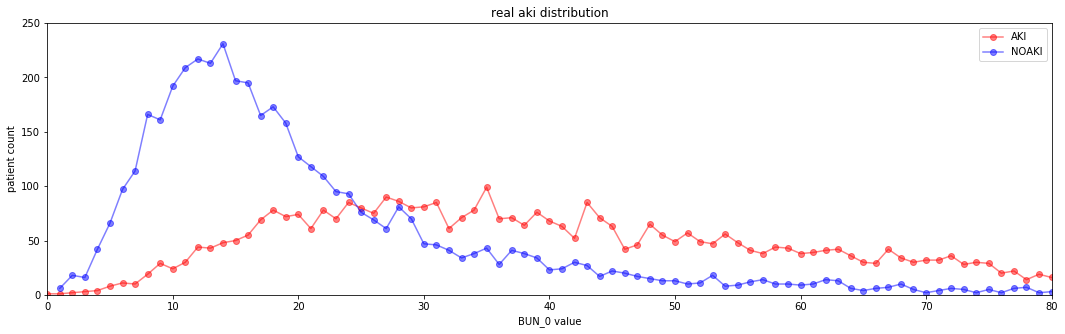

In [246]:
x1 = np.arange(0,100,1)
plt.figure(figsize=(18,5))
plt.xlabel("BUN_0 value") 
plt.ylabel("patient count") 
plt.title("real aki distribution") 
real_aki_pt.sort()
true_count = [0]*100
true_value = []

for i in real_aki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 1*ii:
            true_count[ii] += 1
            break
        else:
            ii -= 1

real_noaki_pt.sort()
false_count = [0]*100
false_value = []
for i in real_noaki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 1*ii:
            false_count[ii] += 1
            break
        else:
            ii -= 1

print(true_count)
print(false_count)
i = 0
while i < len(true_count):
    if true_count[i] == 0:
        true_count[i] = None
    i += 1
i = 0
while i < len(false_count):
    if false_count[i] == 0:
        false_count[i] = None
    i += 1

plt.plot(x1,true_count, '-o', color="red",label = 'AKI', alpha=.5)
plt.ylim(0, 250)
plt.xlim(0, 80)
plt.plot(x1,false_count,'-o', color="blue",label = 'NOAKI', alpha=.5)
plt.legend()
plt.show()
aki_true_count = true_count
aki_false_count = false_count

[1, 0, 1, 2, 3, 2, 8, 8, 9, 12, 16, 26, 38, 39, 39, 52, 47, 52, 60, 64, 65, 60, 70, 74, 79, 80, 76, 91, 87, 87, 83, 96, 70, 81, 82, 106, 80, 87, 82, 93, 79, 76, 70, 101, 85, 77, 55, 56, 74, 62, 58, 62, 56, 60, 60, 54, 51, 48, 54, 48, 46, 47, 50, 53, 41, 34, 34, 49, 42, 35, 34, 35, 42, 33, 32, 34, 22, 28, 21, 21, 18, 18, 31, 20, 21, 18, 22, 18, 16, 21, 20, 21, 19, 16, 20, 23, 17, 13, 11, 1277]
[0, 7, 19, 17, 43, 72, 100, 116, 176, 178, 200, 213, 223, 217, 240, 195, 203, 182, 191, 166, 136, 119, 117, 91, 99, 76, 68, 60, 80, 63, 45, 35, 32, 24, 34, 36, 18, 25, 20, 17, 12, 11, 12, 11, 3, 8, 7, 7, 6, 6, 4, 5, 4, 5, 4, 3, 2, 4, 0, 5, 1, 2, 5, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 812]


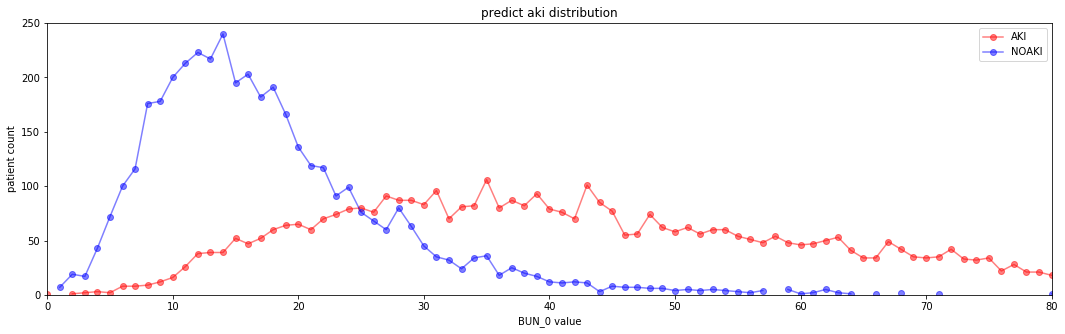

In [247]:
x1 = np.arange(0,100,1)
plt.figure(figsize=(18,5))
plt.xlabel("BUN_0 value") 
plt.ylabel("patient count") 
plt.title("predict aki distribution") 
predict_aki_pt.sort()
true_count = [0]*100
true_value = []

for i in predict_aki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 1*ii:
            true_count[ii] += 1
            break
        else:
            ii -= 1

predict_noaki_pt.sort()
false_count = [0]*100
false_value = []
for i in predict_noaki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 1*ii:
            false_count[ii] += 1
            break
        else:
            ii -= 1

print(true_count)
print(false_count)
i = 0
while i < len(true_count):
    if true_count[i] == 0:
        true_count[i] = None
    i += 1
i = 0
while i < len(false_count):
    if false_count[i] == 0:
        false_count[i] = None
    i += 1
plt.plot(x1,true_count, '-o', color="red",label = 'AKI', alpha=.5)
plt.ylim(0, 250)
plt.xlim(0, 80)
plt.plot(x1,false_count,'-o', color="blue",label = 'NOAKI', alpha=.5)
plt.legend()
plt.show()

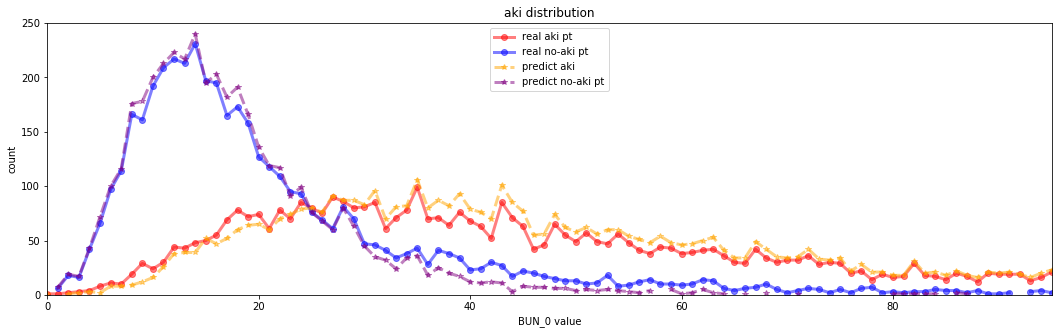

In [248]:
plt.figure(figsize=(18,5))
plt.ylim(0, 250)
plt.xlim(0, 95)
plt.plot(x1,aki_true_count, '-o', color="red", alpha=.5,label = 'real aki pt', lw=3)
plt.plot(x1,aki_false_count,'-o', color="blue", alpha=.5,label = 'real no-aki pt', lw=3)
plt.plot(x1,true_count, '--*', color="orange", alpha=.5,label = 'predict aki', lw=3)
plt.plot(x1,false_count,'--*', color="purple", alpha=.5,label = 'predict no-aki pt', lw=3)
plt.xlabel("BUN_0 value") 
plt.ylabel("count") 
plt.title("aki distribution") 
plt.legend()
plt.show()

In [249]:
feature_where = title.index("Hct_0")
gfr_tp = []
gfr_fp = []
gfr_tn = []
gfr_fn = []
for i in tp:
    pt_where = x_test_pt.index(i)
    gfr_tp.append(x_test[pt_where][feature_where])
for i in fp:
    pt_where = x_test_pt.index(i)
    gfr_fp.append(x_test[pt_where][feature_where])
for i in tn:
    pt_where = x_test_pt.index(i)
    gfr_tn.append(x_test[pt_where][feature_where])
for i in fn:
    pt_where = x_test_pt.index(i)
    gfr_fn.append(x_test[pt_where][feature_where])
plt.figure(figsize=(15,10))

#predict correct or wrong feature
gfr_true_tp = []
gfr_false_tp = []
for i in true_p:
    pt_where = x_test_pt.index(i)
    gfr_true_tp.append(x_test[pt_where][feature_where])
for i in false_p:
    pt_where = x_test_pt.index(i)
    gfr_false_tp.append(x_test[pt_where][feature_where])

#predict aki or not feature
predict_aki_pt = []
predict_noaki_pt = []
for i in p_true:
    pt_where = x_test_pt.index(i)
    predict_aki_pt.append(x_test[pt_where][feature_where])
for i in p_false:
    pt_where = x_test_pt.index(i)
    predict_noaki_pt.append(x_test[pt_where][feature_where])

#real aki or not feature
real_aki_pt = []
real_noaki_pt = []
for i in rp:
    pt_where = x_test_pt.index(i)
    real_aki_pt.append(x_test[pt_where][feature_where])
for i in rn:
    pt_where = x_test_pt.index(i)
    real_noaki_pt.append(x_test[pt_where][feature_where])

<Figure size 1080x720 with 0 Axes>

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 5, 1, 2, 5, 5, 12, 8, 9, 15, 12, 17, 15, 16, 33, 35, 33, 52, 63, 62, 96, 86, 102, 108, 123, 160, 115, 145, 139, 125, 149, 138, 153, 140, 175, 156, 108, 161, 115, 141, 128, 108, 115, 113, 121, 88, 85, 83, 53, 59, 57, 49, 26, 38, 45, 27, 15, 24, 20, 14, 18, 7, 11, 8, 10, 6, 5, 2, 3, 1, 0, 3, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 952]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 6, 2, 7, 5, 5, 4, 3, 15, 12, 5, 14, 16, 22, 17, 24, 27, 37, 32, 46, 58, 60, 69, 74, 72, 96, 97, 94, 120, 116, 120, 116, 150, 147, 99, 205, 153, 180, 180, 148, 176, 168, 190, 150, 121, 156, 101, 123, 102, 72, 81, 55, 54, 39, 22, 29, 14, 27, 12, 10, 6, 3, 5, 5, 2, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 947]


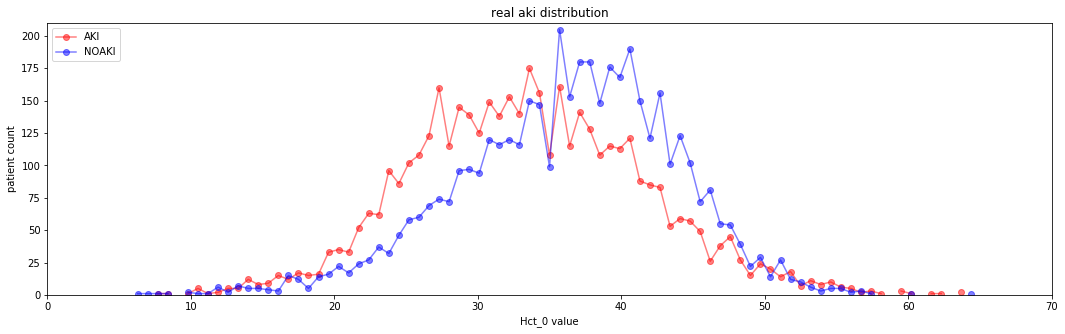

In [250]:
x1 = np.arange(0,70,0.7)
plt.figure(figsize=(18,5))
plt.xlabel("Hct_0 value") 
plt.ylabel("patient count") 
plt.title("real aki distribution") 
real_aki_pt.sort()
true_count = [0]*100
true_value = []

for i in real_aki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 0.7*ii:
            true_count[ii] += 1
            break
        else:
            ii -= 1

real_noaki_pt.sort()
false_count = [0]*100
false_value = []
for i in real_noaki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 0.7*ii:
            false_count[ii] += 1
            break
        else:
            ii -= 1

print(true_count)
print(false_count)
i = 0
while i < len(true_count):
    if true_count[i] == 0:
        true_count[i] = None
    i += 1
i = 0
while i < len(false_count):
    if false_count[i] == 0:
        false_count[i] = None
    i += 1

plt.plot(x1,true_count, '-o', color="red",label = 'AKI', alpha=.5)
plt.ylim(0, 210)
plt.xlim(0, 70)
plt.plot(x1,false_count,'-o', color="blue",label = 'NOAKI', alpha=.5)
plt.legend()
plt.show()
aki_true_count = true_count
aki_false_count = false_count

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 4, 1, 3, 5, 7, 11, 11, 9, 16, 17, 20, 14, 18, 35, 39, 38, 56, 73, 66, 104, 95, 114, 116, 142, 160, 129, 159, 158, 146, 177, 160, 179, 161, 207, 174, 104, 173, 131, 141, 122, 115, 128, 117, 133, 87, 90, 89, 52, 56, 60, 50, 33, 36, 42, 27, 12, 28, 22, 13, 17, 8, 12, 9, 10, 7, 5, 3, 3, 1, 0, 3, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 994]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 5, 2, 5, 6, 2, 4, 2, 10, 9, 6, 12, 14, 18, 12, 20, 17, 33, 24, 37, 46, 52, 50, 74, 58, 82, 78, 73, 92, 94, 94, 95, 118, 129, 103, 193, 137, 180, 186, 141, 163, 164, 178, 151, 116, 150, 102, 126, 99, 71, 74, 57, 57, 39, 25, 25, 12, 28, 13, 9, 5, 2, 5, 4, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 905]


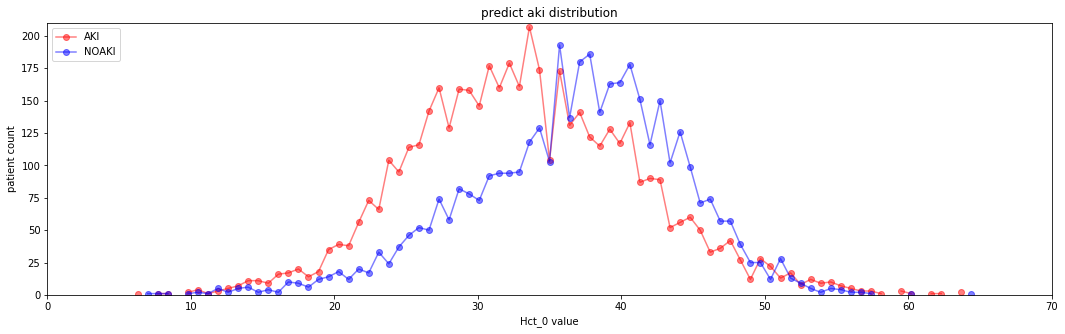

In [251]:
x1 = np.arange(0,70,0.7)
plt.figure(figsize=(18,5))
plt.xlabel("Hct_0 value") 
plt.ylabel("patient count") 
plt.title("predict aki distribution") 
predict_aki_pt.sort()
true_count = [0]*100
true_value = []

for i in predict_aki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 0.7*ii:
            true_count[ii] += 1
            break
        else:
            ii -= 1

predict_noaki_pt.sort()
false_count = [0]*100
false_value = []
for i in predict_noaki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 0.7*ii:
            false_count[ii] += 1
            break
        else:
            ii -= 1

print(true_count)
print(false_count)
i = 0
while i < len(true_count):
    if true_count[i] == 0:
        true_count[i] = None
    i += 1
i = 0
while i < len(false_count):
    if false_count[i] == 0:
        false_count[i] = None
    i += 1

plt.plot(x1,true_count, '-o', color="red",label = 'AKI', alpha=.5)
plt.ylim(0, 210)
plt.xlim(0, 70)
plt.plot(x1,false_count,'-o', color="blue",label = 'NOAKI', alpha=.5)
plt.legend()
plt.show()

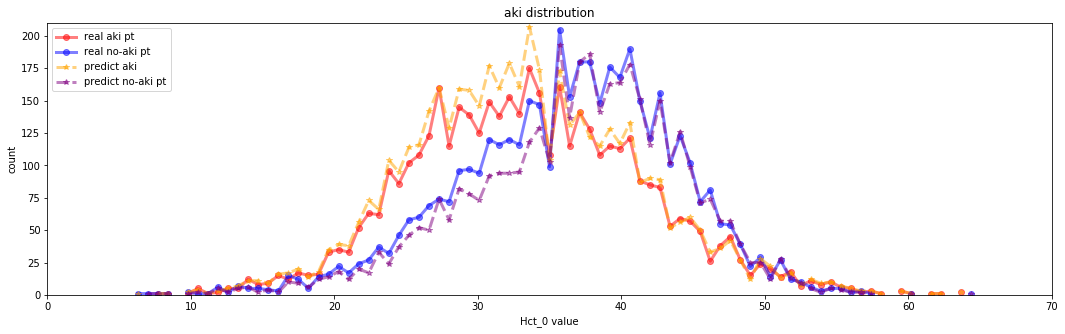

In [252]:
plt.figure(figsize=(18,5))
plt.ylim(0, 210)
plt.xlim(0, 70)
plt.plot(x1,aki_true_count, '-o', color="red", alpha=.5,label = 'real aki pt', lw=3)
plt.plot(x1,aki_false_count,'-o', color="blue", alpha=.5,label = 'real no-aki pt', lw=3)
plt.plot(x1,true_count, '--*', color="orange", alpha=.5,label = 'predict aki', lw=3)
plt.plot(x1,false_count,'--*', color="purple", alpha=.5,label = 'predict no-aki pt', lw=3)
plt.xlabel("Hct_0 value") 
plt.ylabel("count") 
plt.title("aki distribution") 
plt.legend()
plt.show()

In [253]:
feature_where = title.index("gfr")
gfr_tp = []
gfr_fp = []
gfr_tn = []
gfr_fn = []
for i in tp:
    pt_where = x_test_pt.index(i)
    gfr_tp.append(x_test[pt_where][feature_where])
for i in fp:
    pt_where = x_test_pt.index(i)
    gfr_fp.append(x_test[pt_where][feature_where])
for i in tn:
    pt_where = x_test_pt.index(i)
    gfr_tn.append(x_test[pt_where][feature_where])
for i in fn:
    pt_where = x_test_pt.index(i)
    gfr_fn.append(x_test[pt_where][feature_where])
plt.figure(figsize=(15,10))

#predict correct or wrong feature
gfr_true_tp = []
gfr_false_tp = []
for i in true_p:
    pt_where = x_test_pt.index(i)
    gfr_true_tp.append(x_test[pt_where][feature_where])
for i in false_p:
    pt_where = x_test_pt.index(i)
    gfr_false_tp.append(x_test[pt_where][feature_where])

#predict aki or not feature
predict_aki_pt = []
predict_noaki_pt = []
for i in p_true:
    pt_where = x_test_pt.index(i)
    predict_aki_pt.append(x_test[pt_where][feature_where])
for i in p_false:
    pt_where = x_test_pt.index(i)
    predict_noaki_pt.append(x_test[pt_where][feature_where])

#real aki or not feature
real_aki_pt = []
real_noaki_pt = []
for i in rp:
    pt_where = x_test_pt.index(i)
    real_aki_pt.append(x_test[pt_where][feature_where])
for i in rn:
    pt_where = x_test_pt.index(i)
    real_noaki_pt.append(x_test[pt_where][feature_where])

<Figure size 1080x720 with 0 Axes>

[0, 0, 0, 0, 0, 0, 0, 12, 23, 40, 50, 65, 66, 80, 94, 93, 108, 89, 96, 92, 85, 82, 89, 75, 70, 71, 81, 68, 68, 56, 60, 56, 54, 45, 53, 39, 37, 41, 43, 44, 29, 33, 42, 29, 22, 31, 30, 21, 24, 22, 30, 23, 15, 21, 15, 16, 8, 6, 10, 10, 9, 8, 8, 11, 6, 8, 3, 6, 5, 5, 9, 5, 6, 6, 4, 4, 5, 3, 3, 4, 2, 3, 3, 2, 4, 2, 1, 1, 4, 1, 4, 1, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 0, 2, 3, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2593]
[0, 0, 0, 0, 0, 0, 0, 3, 2, 4, 4, 16, 13, 9, 14, 9, 14, 14, 21, 15, 19, 21, 16, 18, 14, 21, 14, 19, 21, 19, 20, 19, 27, 28, 21, 26, 23, 25, 22, 22, 31, 25, 31, 20, 32, 34, 27, 32, 24, 31, 38, 30, 29, 27, 22, 22, 26, 33, 34, 30, 23, 38, 29, 22, 42, 21, 36, 24, 34, 38, 20, 30, 27, 28, 24, 31, 29, 31, 30, 28, 26, 36, 27, 23, 21, 26, 29, 20, 29,

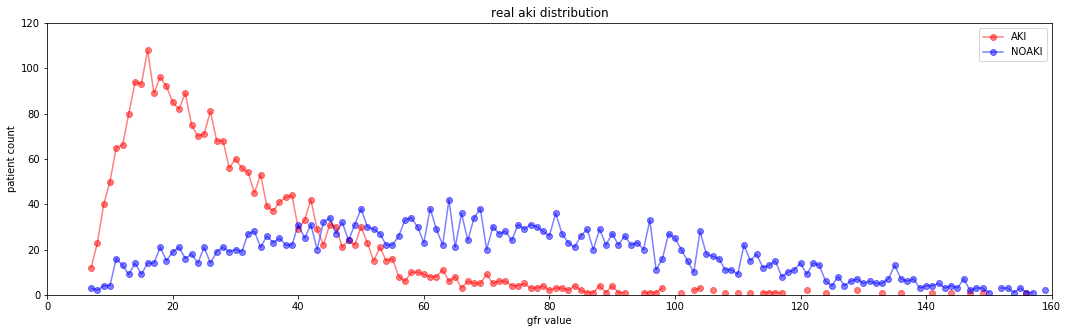

In [259]:
x1 = np.arange(0,200,1)
plt.figure(figsize=(18,5))
plt.xlabel("gfr value") 
plt.ylabel("patient count") 
plt.title("real aki distribution") 
real_aki_pt.sort()
true_count = [0]*200
true_value = []

for i in real_aki_pt:
    ii = 199
    while ii >= 0 :
        if float(i) > 1*ii:
            true_count[ii] += 1
            break
        else:
            ii -= 1

real_noaki_pt.sort()
false_count = [0]*200
false_value = []
for i in real_noaki_pt:
    ii = 199
    while ii >= 0 :
        if float(i) > 1*ii:
            false_count[ii] += 1
            break
        else:
            ii -= 1

print(true_count)
print(false_count)
i = 0
while i < len(true_count):
    if true_count[i] == 0:
        true_count[i] = None
    i += 1
i = 0
while i < len(false_count):
    if false_count[i] == 0:
        false_count[i] = None
    i += 1

plt.plot(x1,true_count, '-o', color="red",label = 'AKI', alpha=.5)
plt.ylim(0, 120)
plt.xlim(0, 160)
plt.plot(x1,false_count,'-o', color="blue",label = 'NOAKI', alpha=.5)
plt.legend()
plt.show()
aki_true_count = true_count
aki_false_count = false_count

[0, 0, 0, 0, 0, 0, 0, 15, 25, 44, 54, 81, 79, 89, 108, 102, 121, 103, 117, 107, 104, 102, 105, 93, 84, 92, 94, 87, 83, 72, 71, 67, 66, 59, 59, 47, 45, 47, 46, 44, 35, 31, 41, 26, 24, 26, 23, 18, 21, 18, 20, 20, 9, 11, 11, 11, 8, 5, 4, 5, 5, 7, 4, 5, 6, 6, 2, 3, 0, 4, 5, 0, 4, 3, 3, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2805]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 6, 3, 9, 8, 15, 14, 15, 18, 15, 19, 19, 22, 25, 27, 32, 23, 30, 39, 34, 35, 27, 35, 48, 33, 35, 37, 26, 27, 26, 34, 40, 35, 27, 39, 33, 28, 42, 23, 37, 27, 39, 39, 24, 35, 29, 31, 25, 34, 33, 34, 32, 30, 27, 38, 29, 24, 23, 28, 30, 20, 32, 23, 29, 22, 27

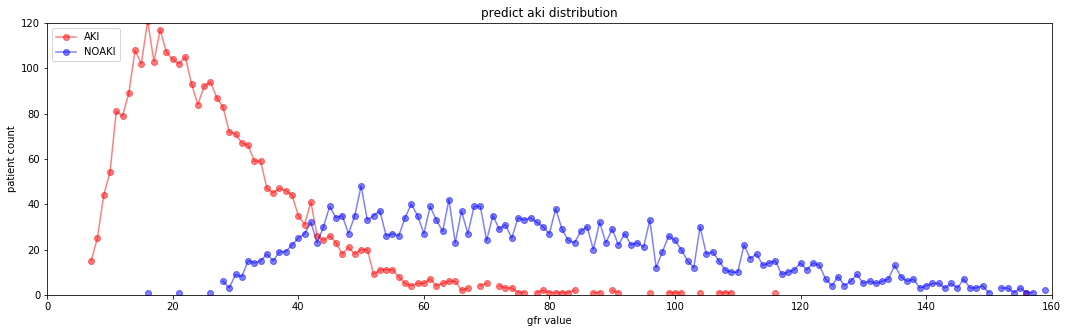

In [261]:
x1 = np.arange(0,200,1)
plt.figure(figsize=(18,5))
plt.xlabel("gfr value") 
plt.ylabel("patient count") 
plt.title("predict aki distribution") 
predict_aki_pt.sort()
true_count = [0]*200
true_value = []

for i in predict_aki_pt:
    ii = 199
    while ii >= 0 :
        if float(i) > 1*ii:
            true_count[ii] += 1
            break
        else:
            ii -= 1

predict_noaki_pt.sort()
false_count = [0]*200
false_value = []
for i in predict_noaki_pt:
    ii = 199
    while ii >= 0 :
        if float(i) > 1*ii:
            false_count[ii] += 1
            break
        else:
            ii -= 1

print(true_count)
print(false_count)
i = 0
while i < len(true_count):
    if true_count[i] == 0:
        true_count[i] = None
    i += 1
i = 0
while i < len(false_count):
    if false_count[i] == 0:
        false_count[i] = None
    i += 1

plt.plot(x1,true_count, '-o', color="red",label = 'AKI', alpha=.5)
plt.ylim(0, 120)
plt.xlim(0, 160)
plt.plot(x1,false_count,'-o', color="blue",label = 'NOAKI', alpha=.5)
plt.legend()
plt.show()

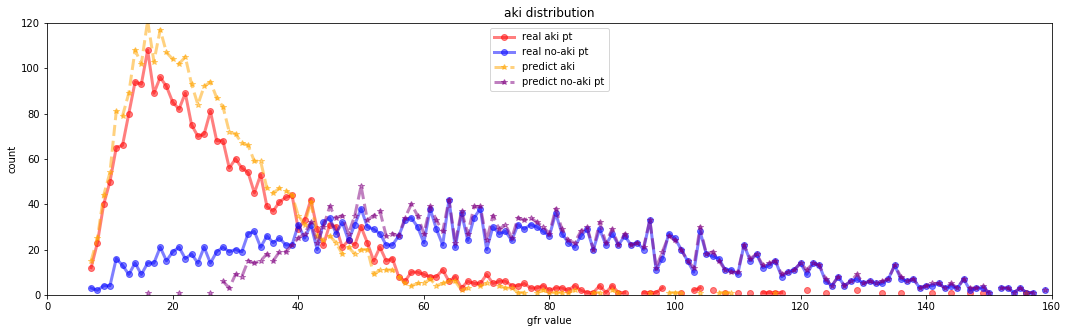

In [262]:
plt.figure(figsize=(18,5))
plt.ylim(0, 120)
plt.xlim(0, 160)
plt.plot(x1,aki_true_count, '-o', color="red", alpha=.5,label = 'real aki pt', lw=3)
plt.plot(x1,aki_false_count,'-o', color="blue", alpha=.5,label = 'real no-aki pt', lw=3)
plt.plot(x1,true_count, '--*', color="orange", alpha=.5,label = 'predict aki', lw=3)
plt.plot(x1,false_count,'--*', color="purple", alpha=.5,label = 'predict no-aki pt', lw=3)
plt.xlabel("gfr value") 
plt.ylabel("count") 
plt.title("aki distribution") 
plt.legend()
plt.show()

In [263]:
feature_where = title.index("MSI_0")
gfr_tp = []
gfr_fp = []
gfr_tn = []
gfr_fn = []
for i in tp:
    pt_where = x_test_pt.index(i)
    gfr_tp.append(x_test[pt_where][feature_where])
for i in fp:
    pt_where = x_test_pt.index(i)
    gfr_fp.append(x_test[pt_where][feature_where])
for i in tn:
    pt_where = x_test_pt.index(i)
    gfr_tn.append(x_test[pt_where][feature_where])
for i in fn:
    pt_where = x_test_pt.index(i)
    gfr_fn.append(x_test[pt_where][feature_where])
plt.figure(figsize=(15,10))

#predict correct or wrong feature
gfr_true_tp = []
gfr_false_tp = []
for i in true_p:
    pt_where = x_test_pt.index(i)
    gfr_true_tp.append(x_test[pt_where][feature_where])
for i in false_p:
    pt_where = x_test_pt.index(i)
    gfr_false_tp.append(x_test[pt_where][feature_where])

#predict aki or not feature
predict_aki_pt = []
predict_noaki_pt = []
for i in p_true:
    pt_where = x_test_pt.index(i)
    predict_aki_pt.append(x_test[pt_where][feature_where])
for i in p_false:
    pt_where = x_test_pt.index(i)
    predict_noaki_pt.append(x_test[pt_where][feature_where])

#real aki or not feature
real_aki_pt = []
real_noaki_pt = []
for i in rp:
    pt_where = x_test_pt.index(i)
    real_aki_pt.append(x_test[pt_where][feature_where])
for i in rn:
    pt_where = x_test_pt.index(i)
    real_noaki_pt.append(x_test[pt_where][feature_where])

<Figure size 1080x720 with 0 Axes>

[0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 3, 4, 12, 15, 21, 24, 30, 34, 46, 52, 76, 83, 93, 98, 122, 118, 141, 147, 125, 139, 131, 169, 167, 167, 126, 167, 145, 145, 134, 118, 124, 88, 99, 111, 93, 97, 72, 87, 65, 75, 56, 64, 44, 41, 29, 27, 32, 33, 27, 34, 27, 19, 23, 18, 17, 13, 11, 10, 10, 10, 5, 10, 6, 6, 5, 9, 5, 7, 7, 1, 6, 4, 4, 2, 0, 0, 5, 1, 4, 2, 2, 1, 3, 1, 1, 0, 1, 923]
[0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 4, 6, 13, 21, 19, 26, 49, 54, 82, 86, 82, 115, 132, 134, 117, 138, 144, 172, 156, 157, 144, 147, 159, 142, 139, 102, 125, 132, 122, 94, 90, 73, 71, 68, 60, 48, 45, 57, 56, 29, 39, 28, 35, 21, 24, 23, 25, 12, 23, 14, 16, 15, 10, 9, 12, 8, 4, 9, 8, 10, 4, 5, 2, 2, 1, 3, 2, 4, 1, 0, 1, 0, 4, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1336]


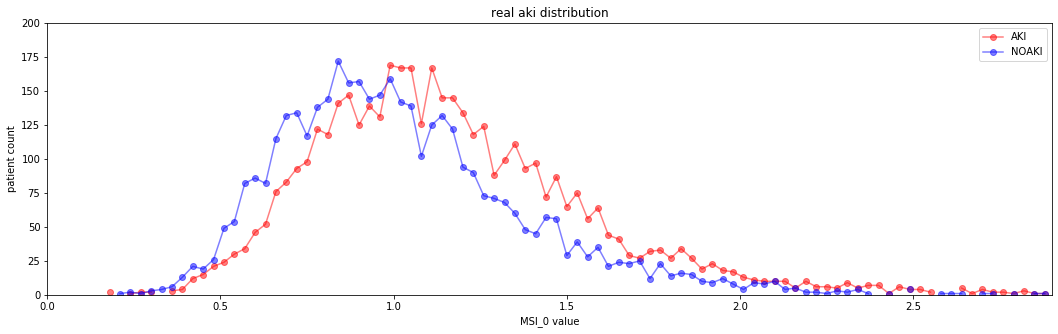

In [276]:
x1 = np.arange(0,3,0.03)
plt.figure(figsize=(18,5))
plt.xlabel("MSI_0 value") 
plt.ylabel("patient count") 
plt.title("real aki distribution") 
real_aki_pt.sort()
true_count = [0]*100
true_value = []

for i in real_aki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 0.03*ii:
            true_count[ii] += 1
            break
        else:
            ii -= 1

real_noaki_pt.sort()
false_count = [0]*100
false_value = []
for i in real_noaki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 0.03*ii:
            false_count[ii] += 1
            break
        else:
            ii -= 1

print(true_count)
print(false_count)
i = 0
while i < len(true_count):
    if true_count[i] == 0:
        true_count[i] = None
    i += 1
i = 0
while i < len(false_count):
    if false_count[i] == 0:
        false_count[i] = None
    i += 1

plt.plot(x1,true_count, '-o', color="red",label = 'AKI', alpha=.5)
plt.ylim(0, 200)
plt.xlim(0, 2.9)
plt.plot(x1,false_count,'-o', color="blue",label = 'NOAKI', alpha=.5)
plt.legend()
plt.show()
aki_true_count = true_count
aki_false_count = false_count

[0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 3, 14, 16, 22, 28, 31, 37, 47, 48, 77, 98, 95, 102, 120, 126, 163, 160, 138, 155, 151, 181, 184, 188, 146, 191, 161, 163, 144, 134, 120, 103, 108, 119, 102, 96, 83, 97, 68, 82, 60, 66, 49, 45, 35, 35, 34, 38, 36, 37, 32, 24, 25, 21, 22, 11, 12, 11, 16, 9, 7, 11, 7, 7, 8, 11, 7, 8, 6, 1, 5, 6, 4, 2, 1, 1, 6, 0, 5, 2, 2, 1, 3, 1, 2, 0, 1, 922]
[0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 3, 4, 7, 14, 19, 18, 25, 45, 53, 79, 85, 86, 114, 117, 132, 113, 140, 136, 150, 143, 144, 128, 127, 147, 125, 118, 82, 101, 116, 104, 84, 74, 77, 56, 59, 52, 39, 46, 46, 46, 26, 32, 24, 33, 16, 20, 17, 17, 10, 18, 5, 13, 10, 5, 7, 9, 3, 6, 8, 7, 4, 5, 3, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1337]


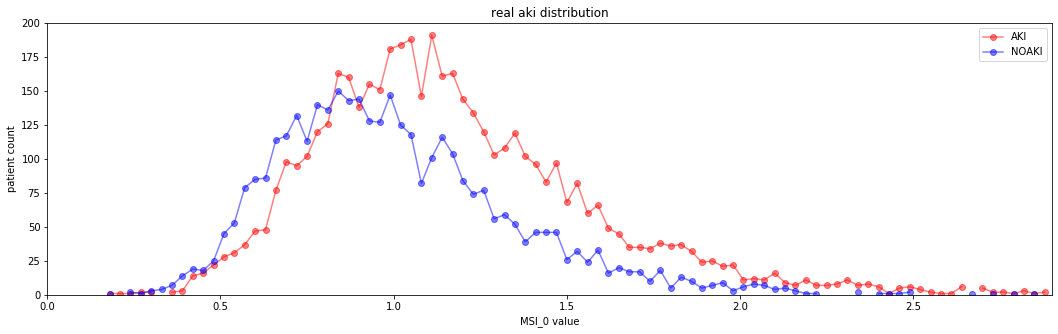

In [277]:
x1 = np.arange(0,3,0.03)
plt.figure(figsize=(18,5))
plt.xlabel("MSI_0 value") 
plt.ylabel("patient count") 
plt.title("real aki distribution") 
predict_aki_pt.sort()
true_count = [0]*100
true_value = []

for i in predict_aki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 0.03*ii:
            true_count[ii] += 1
            break
        else:
            ii -= 1

predict_noaki_pt.sort()
false_count = [0]*100
false_value = []
for i in predict_noaki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 0.03*ii:
            false_count[ii] += 1
            break
        else:
            ii -= 1

print(true_count)
print(false_count)
i = 0
while i < len(true_count):
    if true_count[i] == 0:
        true_count[i] = None
    i += 1
i = 0
while i < len(false_count):
    if false_count[i] == 0:
        false_count[i] = None
    i += 1

plt.plot(x1,true_count, '-o', color="red",label = 'AKI', alpha=.5)
plt.ylim(0, 200)
plt.xlim(0, 2.9)
plt.plot(x1,false_count,'-o', color="blue",label = 'NOAKI', alpha=.5)
plt.legend()
plt.show()

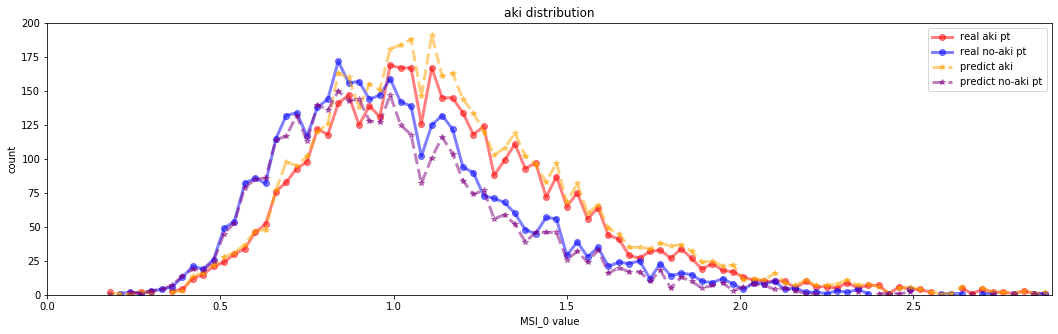

In [278]:
plt.figure(figsize=(18,5))
plt.ylim(0, 200)
plt.xlim(0, 2.9)
plt.plot(x1,aki_true_count, '-o', color="red", alpha=.5,label = 'real aki pt', lw=3)
plt.plot(x1,aki_false_count,'-o', color="blue", alpha=.5,label = 'real no-aki pt', lw=3)
plt.plot(x1,true_count, '--*', color="orange", alpha=.5,label = 'predict aki', lw=3)
plt.plot(x1,false_count,'--*', color="purple", alpha=.5,label = 'predict no-aki pt', lw=3)
plt.xlabel("MSI_0 value") 
plt.ylabel("count") 
plt.title("aki distribution") 
plt.legend()
plt.show()

In [218]:
feature_where = title.index("sodium 0")
gfr_tp = []
gfr_fp = []
gfr_tn = []
gfr_fn = []
for i in tp:
    pt_where = x_test_pt.index(i)
    gfr_tp.append(x_test[pt_where][feature_where])
for i in fp:
    pt_where = x_test_pt.index(i)
    gfr_fp.append(x_test[pt_where][feature_where])
for i in tn:
    pt_where = x_test_pt.index(i)
    gfr_tn.append(x_test[pt_where][feature_where])
for i in fn:
    pt_where = x_test_pt.index(i)
    gfr_fn.append(x_test[pt_where][feature_where])
plt.figure(figsize=(15,10))

#predict correct or wrong feature
gfr_true_tp = []
gfr_false_tp = []
for i in true_p:
    pt_where = x_test_pt.index(i)
    gfr_true_tp.append(x_test[pt_where][feature_where])
for i in false_p:
    pt_where = x_test_pt.index(i)
    gfr_false_tp.append(x_test[pt_where][feature_where])

#predict aki or not feature
predict_aki_pt = []
predict_noaki_pt = []
for i in p_true:
    pt_where = x_test_pt.index(i)
    predict_aki_pt.append(x_test[pt_where][feature_where])
for i in p_false:
    pt_where = x_test_pt.index(i)
    predict_noaki_pt.append(x_test[pt_where][feature_where])

#real aki or not feature
real_aki_pt = []
real_noaki_pt = []
for i in rp:
    pt_where = x_test_pt.index(i)
    real_aki_pt.append(x_test[pt_where][feature_where])
for i in rn:
    pt_where = x_test_pt.index(i)
    real_noaki_pt.append(x_test[pt_where][feature_where])

ValueError: 'sodium 0' is not in list

[0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 0, 3, 1, 0, 1, 0, 2, 3, 0, 5, 0, 5, 6, 0, 7, 0, 8, 15, 0, 21, 0, 19, 23, 0, 24, 0, 32, 39, 1, 48, 0, 69, 72, 0, 82, 0, 112, 153, 1, 171, 0, 180, 244, 2, 277, 1, 286, 336, 3, 347, 2, 348, 321, 2, 317, 1, 277, 244, 0, 185, 0, 134, 108, 0, 82, 0, 62, 37, 0, 58, 0, 24, 22, 0, 18, 0, 15, 9, 0, 7, 0, 15, 7, 0, 6, 0, 11, 33]
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 0, 3, 1, 0, 2, 0, 2, 4, 0, 5, 0, 4, 1, 0, 4, 0, 7, 9, 0, 12, 0, 19, 19, 0, 15, 0, 23, 28, 0, 31, 0, 66, 58, 0, 95, 0, 116, 126, 0, 164, 0, 239, 262, 2, 329, 1, 371, 337, 6, 331, 1, 276, 203, 3, 147, 0, 96, 64, 2, 33, 0, 30, 12, 0, 15, 0, 5, 7, 0, 1, 0, 5, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 5]


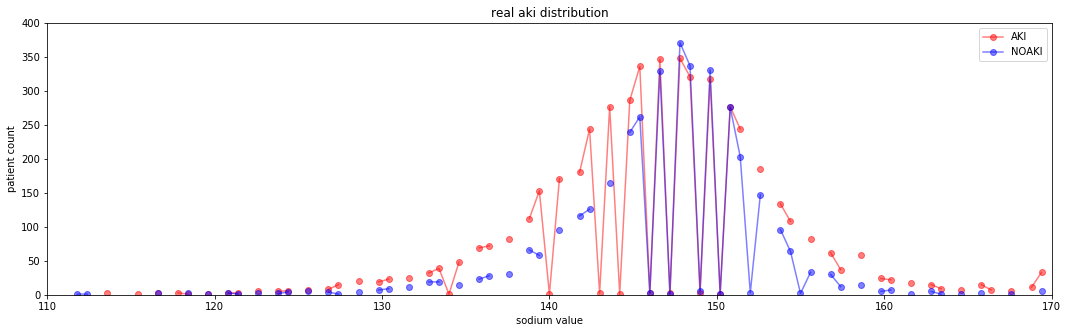

In [33]:
x1 = np.arange(110,170,0.6)
plt.figure(figsize=(18,5))
plt.xlabel("sodium value") 
plt.ylabel("patient count") 
plt.title("real aki distribution") 
real_aki_pt.sort()
true_count = [0]*100
true_value = []

for i in real_aki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 0.6*ii+100:
            true_count[ii] += 1
            break
        else:
            ii -= 1

real_noaki_pt.sort()
false_count = [0]*100
false_value = []
for i in real_noaki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 0.6*ii+100:
            false_count[ii] += 1
            break
        else:
            ii -= 1

print(true_count)
print(false_count)
i = 0
while i < len(true_count):
    if true_count[i] == 0:
        true_count[i] = None
    i += 1
i = 0
while i < len(false_count):
    if false_count[i] == 0:
        false_count[i] = None
    i += 1

plt.plot(x1,true_count, '-o', color="red",label = 'AKI', alpha=.5)
plt.ylim(0, 400)
plt.xlim(110, 170)
plt.plot(x1,false_count,'-o', color="blue",label = 'NOAKI', alpha=.5)
plt.legend()
plt.show()
aki_true_count = true_count
aki_false_count = false_count

[0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 0, 3, 2, 0, 1, 0, 1, 1, 0, 5, 0, 5, 6, 0, 7, 0, 9, 14, 0, 22, 0, 18, 27, 0, 29, 0, 38, 39, 1, 51, 0, 78, 78, 0, 87, 0, 132, 161, 1, 195, 0, 207, 259, 2, 312, 1, 334, 361, 2, 373, 1, 398, 346, 4, 348, 1, 301, 259, 0, 196, 0, 133, 118, 0, 86, 0, 61, 36, 0, 63, 0, 23, 20, 0, 19, 0, 17, 9, 0, 7, 0, 16, 7, 0, 7, 0, 11, 35]
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 4, 3, 0, 2, 0, 2, 4, 0, 5, 0, 3, 2, 0, 3, 0, 8, 5, 0, 7, 0, 13, 19, 0, 12, 0, 14, 22, 0, 26, 0, 46, 50, 0, 71, 0, 89, 111, 0, 129, 0, 191, 237, 3, 303, 2, 321, 312, 4, 300, 1, 252, 188, 3, 136, 0, 97, 54, 2, 29, 0, 31, 13, 0, 10, 0, 6, 9, 0, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3]


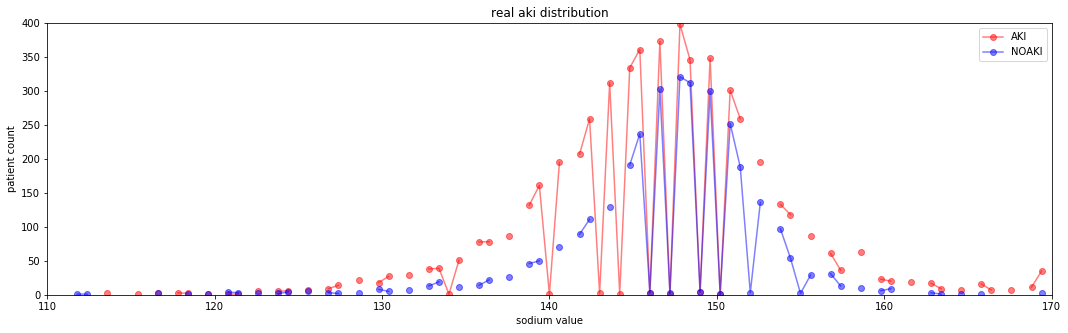

In [34]:
x1 = np.arange(110,170,0.6)
plt.figure(figsize=(18,5))
plt.xlabel("sodium value") 
plt.ylabel("patient count") 
plt.title("real aki distribution") 
predict_aki_pt.sort()
true_count = [0]*100
true_value = []

for i in predict_aki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 0.6*ii+100:
            true_count[ii] += 1
            break
        else:
            ii -= 1

predict_noaki_pt.sort()
false_count = [0]*100
false_value = []
for i in predict_noaki_pt:
    ii = 99
    while ii >= 0 :
        if float(i) > 0.6*ii+100:
            false_count[ii] += 1
            break
        else:
            ii -= 1

print(true_count)
print(false_count)
i = 0
while i < len(true_count):
    if true_count[i] == 0:
        true_count[i] = None
    i += 1
i = 0
while i < len(false_count):
    if false_count[i] == 0:
        false_count[i] = None
    i += 1

plt.plot(x1,true_count, '-o', color="red",label = 'AKI', alpha=.5)
plt.ylim(0, 400)
plt.xlim(110, 170)
plt.plot(x1,false_count,'-o', color="blue",label = 'NOAKI', alpha=.5)
plt.legend()
plt.show()

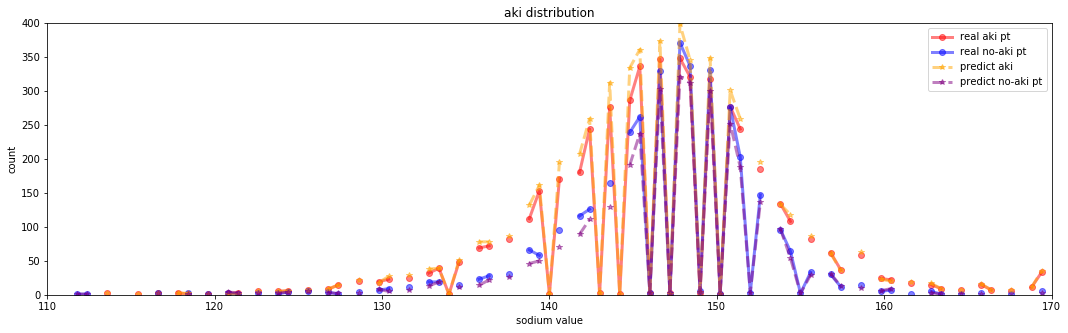

In [38]:
plt.figure(figsize=(18,5))
plt.ylim(0, 400)
plt.xlim(110, 170)
plt.plot(x1,aki_true_count, '-o', color="red", alpha=.5,label = 'real aki pt', lw=3)
plt.plot(x1,aki_false_count,'-o', color="blue", alpha=.5,label = 'real no-aki pt', lw=3)
plt.plot(x1,true_count, '--*', color="orange", alpha=.5,label = 'predict aki', lw=3)
plt.plot(x1,false_count,'--*', color="purple", alpha=.5,label = 'predict no-aki pt', lw=3)
plt.xlabel("sodium value") 
plt.ylabel("count") 
plt.title("aki distribution") 
plt.legend()
plt.show()